In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
print("Dataset loaded")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded
Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Basic Understanding

In [2]:
print("Data types:")
print(df.dtypes)
print(f"\nNumber of features: {len(df.columns)}")

Data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

In [3]:
print("Column names:")
for col in df.columns:
    print(f"  - {col}")

Column names:
  - id
  - diagnosis
  - radius_mean
  - texture_mean
  - perimeter_mean
  - area_mean
  - smoothness_mean
  - compactness_mean
  - concavity_mean
  - concave points_mean
  - symmetry_mean
  - fractal_dimension_mean
  - radius_se
  - texture_se
  - perimeter_se
  - area_se
  - smoothness_se
  - compactness_se
  - concavity_se
  - concave points_se
  - symmetry_se
  - fractal_dimension_se
  - radius_worst
  - texture_worst
  - perimeter_worst
  - area_worst
  - smoothness_worst
  - compactness_worst
  - concavity_worst
  - concave points_worst
  - symmetry_worst
  - fractal_dimension_worst
  - Unnamed: 32


In [4]:
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])
print(f"\nTotal missing values: {missing.sum()}")

Missing values per column:
Unnamed: 32    569
dtype: int64

Total missing values: 569


In [5]:
print("Indexing examples:")
print("\nInteger-based indexing (iloc):")
print(df.iloc[0:3])
print("\nLabel-based indexing (loc):")
print(df.loc[0:2, ['id', 'diagnosis', 'radius_mean']])
print("\nBoolean indexing:")
malignant = df[df['diagnosis'] == 'M']
print(f"Malignant samples: {len(malignant)}")

Indexing examples:

Integer-based indexing (iloc):
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_wo

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Descriptive statistics:")
stats = df[numeric_cols].describe()
print(stats)

Descriptive statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

In [7]:
print("Grouping by diagnosis:")
grouped = df.groupby('diagnosis')[['radius_mean', 'texture_mean', 'area_mean']].agg(['mean', 'median', 'count'])
print(grouped)

Grouping by diagnosis:
          radius_mean               texture_mean                area_mean  \
                 mean  median count         mean median count        mean   
diagnosis                                                                   
B           12.146524  12.200   357    17.914762  17.39   357  462.790196   
M           17.462830  17.325   212    21.604906  21.46   212  978.376415   

                        
          median count  
diagnosis               
B          458.4   357  
M          932.0   212  


## Direct Questions

In [8]:
most_frequent = df['diagnosis'].value_counts()
print("Q1: Most frequently occurring diagnosis:")
print(most_frequent)
print(f"\nAnswer: {most_frequent.index[0]}")

Q1: Most frequently occurring diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64

Answer: B


In [9]:
print("Q2: Area error column data type:")
print(df['area_se'].dtype)

Q2: Area error column data type:
float64


In [10]:
malignant_mean = df[df['diagnosis'] == 'M']['radius_mean'].mean()
benign_mean = df[df['diagnosis'] == 'B']['radius_mean'].mean()
difference = malignant_mean - benign_mean

print("Q3: Average radius_mean comparison:")
print(f"Malignant mean: {malignant_mean:.2f}")
print(f"Benign mean: {benign_mean:.2f}")
print(f"\nAnswer: {difference:.2f} units higher")

Q3: Average radius_mean comparison:
Malignant mean: 17.46
Benign mean: 12.15

Answer: 5.32 units higher


In [11]:
std_values = df[numeric_cols].std()
print("Q4: Standard deviations:")
print(std_values)
lowest_std = std_values.idxmin()
print(f"\nAnswer: {lowest_std} has the lowest standard deviation ({std_values[lowest_std]:.6f})")

Q4: Standard deviations:
id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst     

In [12]:
count = len(df[df['perimeter_worst'] > 100])
print("Q5: Patients with worst perimeter > 100:")
print(f"Answer: {count}")

Q5: Patients with worst perimeter > 100:
Answer: 263


## Visualization

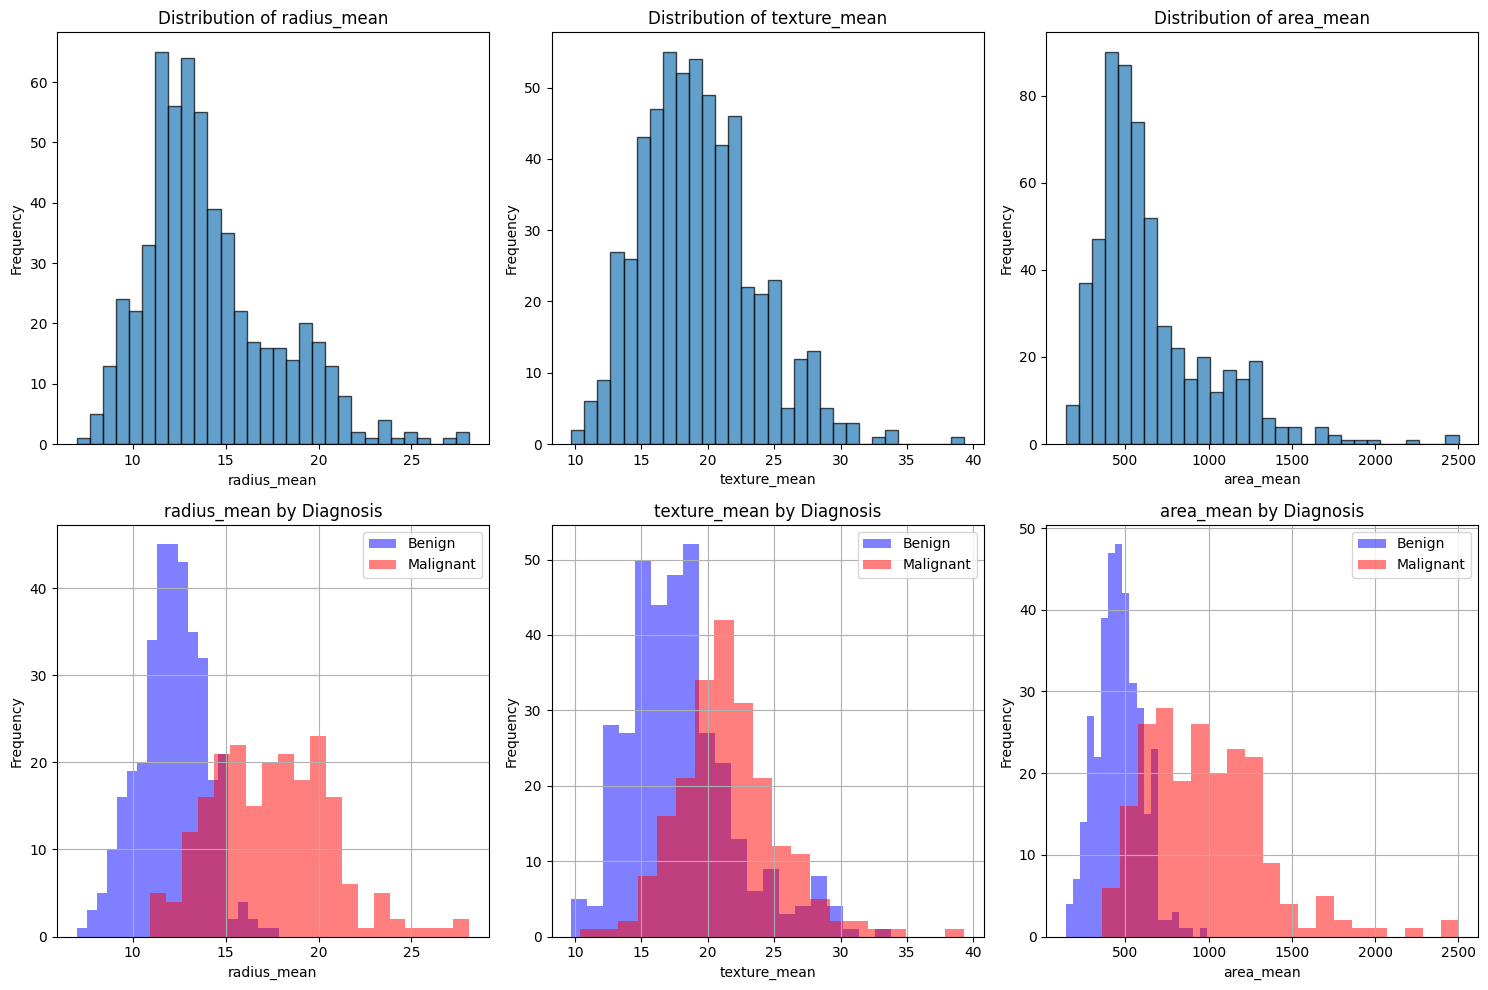

In [13]:
features = ['radius_mean', 'texture_mean', 'area_mean']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(features):
    axes[0, i].hist(df[feature], bins=30, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Distribution of {feature}')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Frequency')
    
    df[df['diagnosis'] == 'B'][feature].hist(ax=axes[1, i], bins=20, alpha=0.5, label='Benign', color='blue')
    df[df['diagnosis'] == 'M'][feature].hist(ax=axes[1, i], bins=20, alpha=0.5, label='Malignant', color='red')
    axes[1, i].set_title(f'{feature} by Diagnosis')
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

Correlation matrix:
                 radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean         1.000000      0.323782        0.997855   0.987357   
texture_mean        0.323782      1.000000        0.329533   0.321086   
perimeter_mean      0.997855      0.329533        1.000000   0.986507   
area_mean           0.987357      0.321086        0.986507   1.000000   
smoothness_mean     0.170581     -0.023389        0.207278   0.177028   

                 smoothness_mean  
radius_mean             0.170581  
texture_mean           -0.023389  
perimeter_mean          0.207278  
area_mean               0.177028  
smoothness_mean         1.000000  


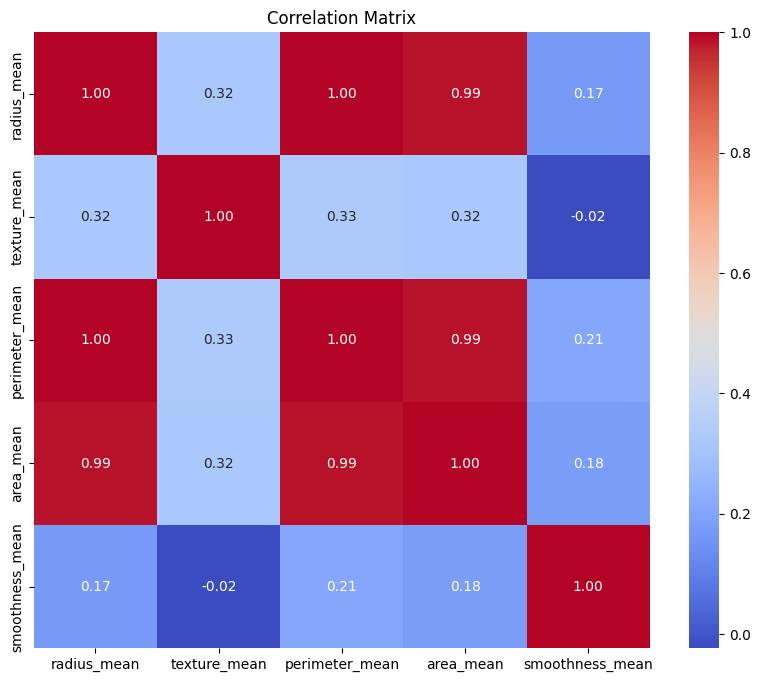

In [14]:
features_corr = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
corr_matrix = df[features_corr].corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

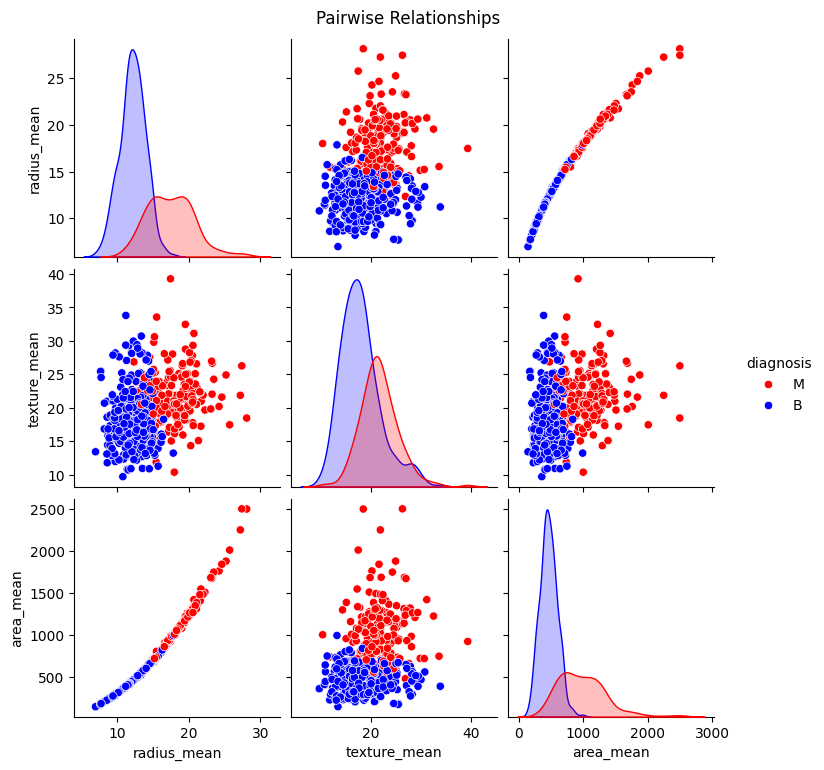

In [15]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'diagnosis']], hue='diagnosis', palette={'B': 'blue', 'M': 'red'})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

C:\Users\Bakir\AppData\Local\Temp\ipykernel_8688\104209414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='diagnosis', y='area_mean', palette={'B': 'blue', 'M': 'red'})


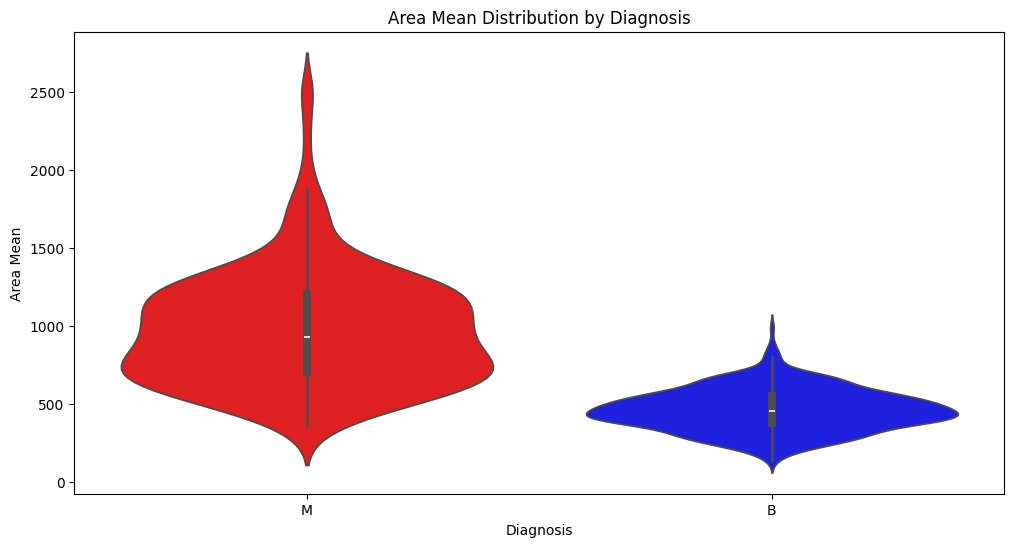

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='diagnosis', y='area_mean', palette={'B': 'blue', 'M': 'red'})
plt.title('Area Mean Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.show()

Feature standard deviations (proxy for importance):
area_mean              351.914129
perimeter_mean          24.298981
texture_mean             4.301036
radius_mean              3.524049
concavity_mean           0.079720
compactness_mean         0.052813
concave points_mean      0.038803
symmetry_mean            0.027414
smoothness_mean          0.014064
dtype: float64


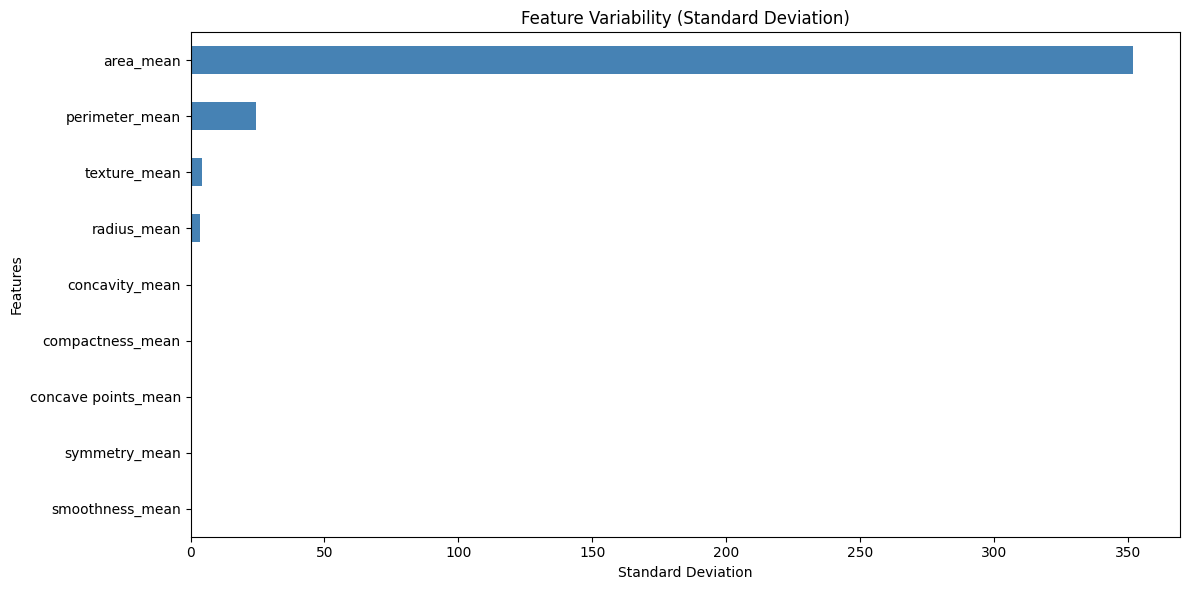

In [17]:
mean_features = [col for col in df.columns if col.endswith('_mean') and col != 'fractal_dimension_mean']
importance_values = df[mean_features].std()

print("Feature standard deviations (proxy for importance):")
print(importance_values.sort_values(ascending=False))

plt.figure(figsize=(12, 6))
importance_values.sort_values().plot(kind='barh', color='steelblue')
plt.title('Feature Variability (Standard Deviation)')
plt.xlabel('Standard Deviation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

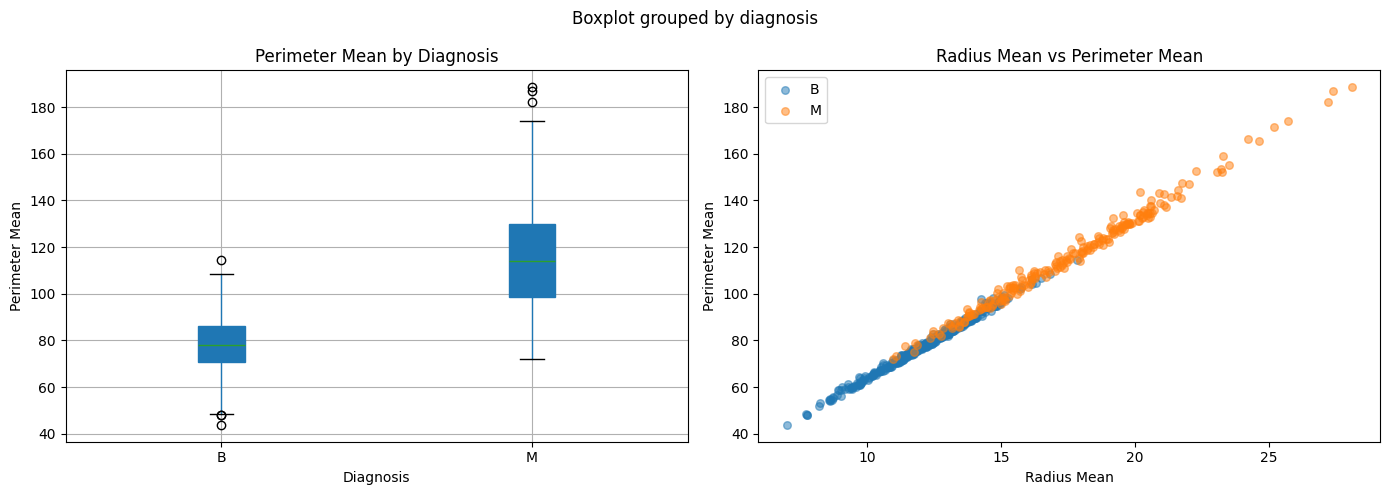

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='perimeter_mean', by='diagnosis', ax=axes[0], patch_artist=True)
axes[0].set_title('Perimeter Mean by Diagnosis')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Perimeter Mean')

for diagnosis in ['B', 'M']:
    subset = df[df['diagnosis'] == diagnosis]
    axes[1].scatter(subset['radius_mean'], subset['perimeter_mean'], 
                   alpha=0.5, label=diagnosis, s=30)
axes[1].set_title('Radius Mean vs Perimeter Mean')
axes[1].set_xlabel('Radius Mean')
axes[1].set_ylabel('Perimeter Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [19]:
print("\n=== SUMMARY ===")
print(f"Total samples: {len(df)}")
print(f"Benign (B): {len(df[df['diagnosis'] == 'B'])}")
print(f"Malignant (M): {len(df[df['diagnosis'] == 'M'])}")
print(f"\nKey findings:")
print(f"- Most frequent diagnosis: {df['diagnosis'].value_counts().index[0]}")
print(f"- Malignant tumors have {difference:.2f} units higher average radius")
print(f"- Feature with lowest std: {lowest_std}")
print(f"- Patients with worst perimeter > 100: {count}")


=== SUMMARY ===
Total samples: 569
Benign (B): 357
Malignant (M): 212

Key findings:
- Most frequent diagnosis: B
- Malignant tumors have 5.32 units higher average radius
- Feature with lowest std: fractal_dimension_se
- Patients with worst perimeter > 100: 263
